# Simulation

## Imports


In [145]:
import sklearn as sk
import pandas as pd
import re
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
import random


## Loading data

In [147]:
raw = pd.read_csv('/content/drive/MyDrive/taillemasse.csv')
raw.head(5)

,Taille (en mm),Masse (en kg)
0,160-165,45-50
1,165-170,55-60
2,170-175,50-55
3,170-175,50-55
4,170-175,50-55


In [148]:
def parse_ranges(r:str)->int:
  matches = re.match(r"(\d*)-(\d*)", r)
  return (int(matches.group(1))+int(matches.group(2)))/2 if matches is not None else None

In [149]:
parsed = raw.applymap(parse_ranges);
parsed.head()

,Taille (en mm),Masse (en kg)
0,162.5,47.5
1,167.5,57.5
2,172.5,52.5
3,172.5,52.5
4,172.5,52.5


## Simulation par liste

### Description

Pour la simulation par liste on duplique un element choisie aleatoirement autent de fois que necessire pour aprendre atteindre les effectifs attendu

### Problemes
Ce mode de simulation peut pauser  des problemes en sur-representant des points de donné qui serait normalement vraiment rare

### Example

In [150]:
def get_new_data(data):
  return data.loc[random.randrange(len(data)-1)]

In [151]:
simulated = [get_new_data(raw)for i in range(0,999)]
for i in range(0,999):
  simulated[i].name = i
simulated = pd.DataFrame(simulated)
simulated

,Taille (en mm),Masse (en kg)
0,170-175,50-55
1,170-175,50-55
2,175-180,60-65
3,170-175,50-55
4,180-185,75-80
...,...,...
994,175-180,60-65
995,170-175,65-70
996,180-185,75-80
997,175-180,75-80


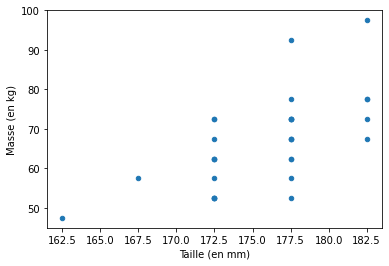

In [152]:
parsed_simulated = raw.applymap(parse_ranges);
parsed_simulated.plot.scatter('Taille (en mm)','Masse (en kg)')

## Simulation Normales

### Description
Dans cette methode on transforme les donnés pour retrouver des variables qui suivent la fonction normale.
Une fois ces variable normale trouvées, on peut generer autant de point de données qu'on veut, puis ont peut leur appliquer l'inverse des transformation maniere à avoir des données cohérent avec les donnés de depart


#### Problemes 
Ce modele suppose que la loi soujacente des donnés est la loi normale ce qui fait qu'elle n'est utile que pour simuler des donnés de cette nature

### Example

#### Getting covariance matrix mean and standard deviation

In [153]:
np_parsed = parsed.to_numpy()
mean = np.mean(np_parsed,0)
cov = np.cov(centered_data.T)
centered_data = np_parsed - mean
rotated_data = np.linalg.inv(cov)@centered_data.T
std = np.std(rotated_data.T, 0)

In [154]:
unrotated_simulated = np.array([np.array([np.random.normal(0,std[0]),np.random.normal(0,std[1])]) for i in range(999)])
rotated_simulated = cov@unrotated_simulated.T
simulated = rotated_simulated.T + mean


### Visualisation

Text(0.5, 1.0, 'Simulated point (blue) + Data(orange)')

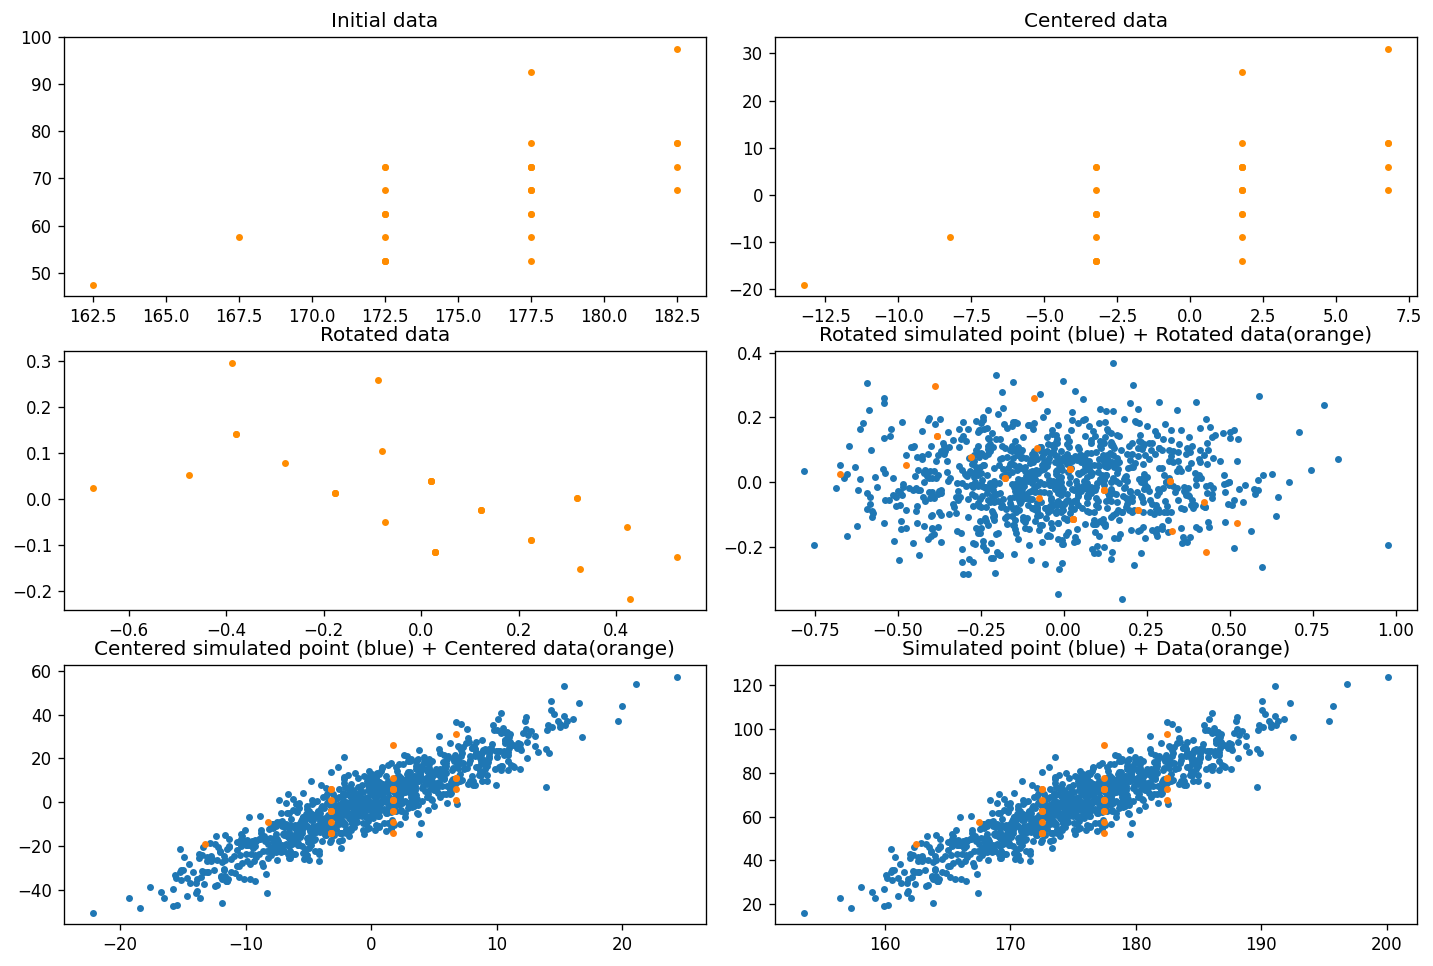

In [155]:
fig,axs = plt.subplots(3,2,figsize=(12,8), dpi=120)
fig.tight_layout()
axs[0,0].scatter(np_parsed[:,0],np_parsed[:,1], color="darkorange", s=10)
axs[0,0].set_title("Initial data")
axs[0,1].scatter(centered_data[:,0],centered_data[:,1], color="darkorange", s=10)
axs[0,1].set_title("Centered data")
axs[1,0].scatter(rotated_data.T[:,0],rotated_data.T[:,1], color="darkorange", s=10)
axs[1,0].set_title("Rotated data")
axs[1,1].scatter(unrotated_simulated[:,0],unrotated_simulated[:,1], s=10)
axs[1,1].scatter(rotated_data.T[:,0],rotated_data.T[:,1], s=10)
axs[1,1].set_title("Rotated simulated point (blue) + Rotated data(orange)")
axs[2,0].scatter(rotated_simulated.T[:,0],rotated_simulated.T[:,1], s=10)
axs[2,0].scatter(centered_data[:,0],centered_data[:,1], s=10)
axs[2,0].set_title("Centered simulated point (blue) + Centered data(orange)")
axs[2,1].scatter(simulated[:,0],simulated[:,1], s=10)
axs[2,1].scatter(np_parsed[:,0],np_parsed[:,1], s=10)
axs[2,1].set_title("Simulated point (blue) + Data(orange)")